In [5]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

In [6]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(y_train[5])

2


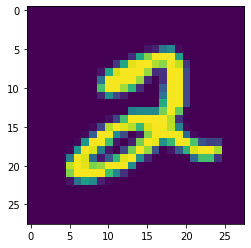

In [7]:
plt.imshow(X_train[5])
plt.show()

In [34]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], )
model.fit(x_train, y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5907 - accuracy: 0.8760
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3469 - accuracy: 0.9275
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2324 - accuracy: 0.9428


In [38]:
predictions=model.predict(x_test)
(predictions[8])

array([3.2672668e-07, 1.0095386e-09, 2.4522827e-12, 1.0428721e-05,
       9.5172973e-06, 8.7323362e-01, 1.2674293e-01, 7.2550549e-11,
       2.6245104e-06, 6.1893951e-07], dtype=float32)

In [39]:
print(np.argmax(predictions[8]))

5


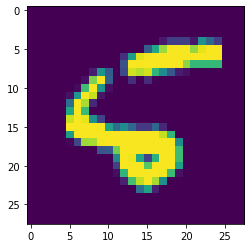

In [40]:
plt.imshow(x_test[8])
plt.show()

In [41]:
predictions=model.predict(x_test)
(predictions[6])

array([3.7686384e-08, 3.0123960e-08, 4.9394426e-11, 1.5289033e-09,
       9.9902058e-01, 9.1885455e-10, 1.5168353e-12, 1.4365619e-04,
       3.2325630e-08, 8.3564676e-04], dtype=float32)

In [42]:
print(np.argmax(predictions[6]))

4


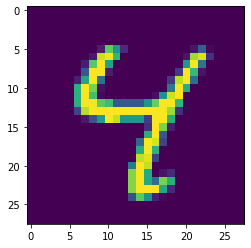

In [43]:
plt.imshow(x_test[6])
plt.show()

In [46]:
predictions=model.predict(x_test)
(predictions[9])
print(np.argmax(predictions[9]))


9


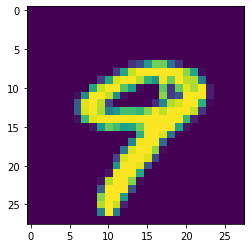

In [45]:
plt.imshow(x_test[9])
plt.show()

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# to calculate accuracy
from sklearn.metrics import accuracy_score

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/10
469/469 [==============================] - 30s 43ms/step - loss: 0.3596 - accuracy: 0.8989 - val_loss: 0.0724 - val_accuracy: 0.9783
Epoch 2/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0571 - accuracy: 0.9836 - val_loss: 0.0567 - val_accuracy: 0.9813
Epoch 3/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0310 - accuracy: 0.9906 - val_loss: 0.0496 - val_accuracy: 0.9834
Epoch 4/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0197 - accuracy: 0.9944 - val_loss: 0.0597 - val_accuracy: 0.9824
Epoch 5/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0129 - accuracy: 0.9963 - val_loss: 0.0454 - val_accuracy: 0.9858
Epoch 6/10
469/469 [==============================] - 19s 42ms/step - loss: 0.0077 - accuracy: 0.9980 - val_loss: 0.0525 - val_accuracy: 0.9831
Epoch 7/10
469/469 [==============================] 